In [1]:
# Importing required packages
import pandas as pd
from apyori import apriori
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
# Manually entering transactions
transactions = [['beef', 'chicken', 'milk'], ['beef', 'cheese'], ['cheese', 'boots'], ['beef', 'chicken', 'cheese'],
               ['beef', 'chicken', 'clothes', 'cheese', 'milk'], ['chicken', 'clothes', 'milk'], ['chicken', 'milk', 'clothes']]

In [3]:
products = []
for transaction in transactions:
    for item in transaction:
        if item not in products:
            products.append(item)
products.sort()
print(products)

['beef', 'boots', 'cheese', 'chicken', 'clothes', 'milk']


In [4]:
def market_basket_analysis(transactions, min_support):
    products = []
    for transaction in transactions:
        for item in transaction:
            if item not in products:
                products.append(item)
    products.sort()
    print("All products available in all transactions are : ", products)
    f = {}
    for transaction in transactions:
        for item in transaction:
            count = f.get(item, 0)
            f[item] = count+1
    f = dict(sorted(f.items()))
    print()
    print("Count of Items :")
    print(f)
    c = {k:v for k,v in f.items() if v > min_support*len(transactions)}
    print()
    print("First Candidate Itemsets :")
    print(c)
    products = list(c.keys())
    i = 2
    while len(c) > 1:
        f = {}
        for pair in list(combinations(products, i)):
            count = 0
            for transaction in transactions:
                if all(item in transaction for item in [x for x in pair]):
                    count += 1
            f[pair] = count
        c = {k:v for k,v in f.items() if v > min_support*len(transactions)}
        if len(c)>=1:
            w = c.copy()
            print()
            print(str(i)+"-pair Candidate Itemsets :")
            print(c)
        else:
            print()
            print("No further Candidate Itemsets found with minimum support = ", min_support)
        i += 1
    print()
    print("Most associated items : ", list(w.keys()))

In [5]:
market_basket_analysis(transactions, min_support=0.3)

All products available in all transactions are :  ['beef', 'boots', 'cheese', 'chicken', 'clothes', 'milk']

Count of Items :
{'beef': 4, 'boots': 1, 'cheese': 4, 'chicken': 5, 'clothes': 3, 'milk': 4}

First Candidate Itemsets :
{'beef': 4, 'cheese': 4, 'chicken': 5, 'clothes': 3, 'milk': 4}

2-pair Candidate Itemsets :
{('beef', 'cheese'): 3, ('beef', 'chicken'): 3, ('chicken', 'clothes'): 3, ('chicken', 'milk'): 4, ('clothes', 'milk'): 3}

3-pair Candidate Itemsets :
{('chicken', 'clothes', 'milk'): 3}

Most associated items :  [('chicken', 'clothes', 'milk')]


In [6]:
#Now loading transactions from grocery dataset
transactions = []
with open("grocery_dataset.txt", "r") as f:
    for line in f:
        temp = []
        for word in line[:-1].split(","):
            temp.append(word.rstrip())
        transactions.append(temp)
    f.close()

In [7]:
print("There are total {} transactions in the dataset.".format(len(transactions)))

There are total 9835 transactions in the dataset.


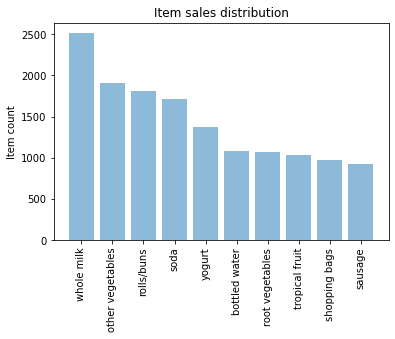

In [8]:
# Distributiom of top 10 products
products = {}
for transaction in transactions:
    for item in transaction:
        mark = products.get(item, 0)
        products[item] = mark+1
product = pd.DataFrame(products.values(), index=products.keys(), columns = ['count'])
product.sort_values(['count'], ascending=False, inplace=True)
plt.bar(np.arange(10), product['count'].head(10), align='center', alpha=0.5)
plt.xticks(np.arange(10), list(product.index)[:10], rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')
plt.show()

In [9]:
print("There are {} unique products purchased across all transactions in the dataset.".format(len(products)))

There are 170 unique products purchased across all transactions in the dataset.


In [10]:
market_basket_analysis(transactions, min_support=0.05)

All products available in all transactions are :  ['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'baby food', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish', 'frozen fruits', 'frozen meals', 'froze